# 연령별 인구 분포 비교 분석
- 행정안전부 주민등록 인구 통계: https://jumin.mois.go.kr/
- 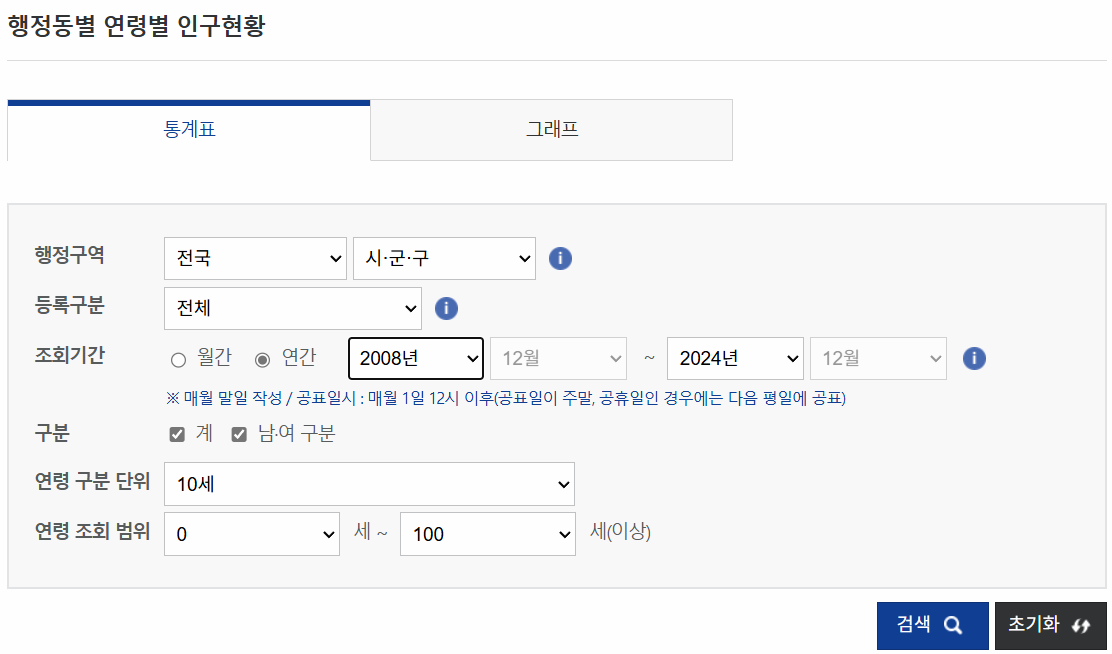
- 행정동별 연령별 인구현황
- 현재 6년간씩 조회가능할것 2008 ~ 2024

In [4]:
# !pip install seaborn
# !pip install hdfs

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34462 sha256=a0a7ef82cf188da0cab622d6bf5ec2f0f70f29974bc290b9a8334cca3f199c8e
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\73\47\b1\0dd88c6852c3332a43828f13823bfd601626f70725a5b5cd91
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-an

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import numpy as np
import seaborn as sns

from hdfs import InsecureClient

Text(0.2, 0.4, '한글')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

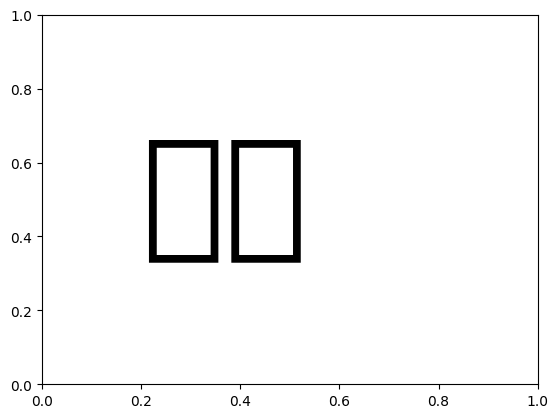

In [6]:
from matplotlib import rc
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

In [ ]:
hdfs = InsecureClient("http://namenode:9870", user="hadoop")
paths = ["200812_201312_연령별인구현황_연간.csv","201412_201912_연령별인구현황_연간.csv","202012_202412_연령별인구현황_연간.csv"]
datas = []
for path in paths:
    with hdfs.read(path, encoding="EUC-KR") as reader:
        datas.append(pd.read_csv(reader))

# total = concat(datas) 
mdata = pd.merge(datas[0],datas[1], on='행정구역' , how='left')
data = pd.merge(mdata,datas[2], on='행정구역' , how='left')
data

In [ ]:
data = data[data.columns[data.columns.str.contains("행정구역|년_남_|년_여_")]]
data = data[data.columns[~data.columns.str.contains("_총인구수|_연령구간인구수")]] # 물결 '~' 표시는 반대값
data

In [ ]:
data = data.melt(id_vars=['행정구역'], var_name='타입', value_name ='value')
data

In [ ]:
data['행정구역'] = data['행정구역'].str.replace(r'\(\d+\)','', regex=True)
data

In [ ]:
test1 = data['타입'].str.split('_')
print(type(test1),test1)
test2 = data['타입'].str.split('_',expand=True)
print(type(test2),test2)
data[['time','gender','age']] = data['타입'].str.split('_',expand=True)
del data['타입']
data.head(5)

In [ ]:
new_data = data.copy()
new_data.info()

In [ ]:
new_data['value'].dtype

In [ ]:
new_data['value'] = new_data['value'].str.replace(',','').fillna(0).astype(int)
new_data.head(3)

In [ ]:
print(new_data['value'].dtype,new_data.info())

In [ ]:
new_data['time'] = pd.to_datetime(new_data['time'], format="%Y년")
new_data.head(3)

In [ ]:
# new_data = new_data.drop(new_data.iloc[0:1].index)
new_data = new_data.drop(new_data[new_data['행정구역'] == '전국  '].index)
new_data.head(3)

In [ ]:
getdata = new_data.copy()
mydata = new_data.copy()
mydata

In [ ]:
# mfilter = mydata['time'] == '2008-01-01'
mfilter = mydata['time'].dt.year == 2008 # 년만 비교해
mydata =  mydata[mfilter]
mydata.sample(5)

In [ ]:
mydata2 = mydata.groupby(['행정구역','age'])['value'].sum().reset_index()
mydata2.head(15)

In [ ]:
# mydata2['per'] = mydata2.groupby(['행정구역'])['value'].transform(lambda x : 100 * x / float(x.sum()))
mydata2['per'] = mydata2.groupby(['행정구역'])['value'].apply(lambda x : 100 * x / float(x.sum())).reset_index(level=0,drop=True)
mydata2

In [ ]:
mydata2 = mydata2.dropna()
mydata2.sample(5)

In [ ]:
mydata2 = mydata2.dropna()
mydata2.head(12)

In [ ]:
# piv_data = mydata2.pivot(index="행정구역", columns='age', values='value')
piv_data = mydata2.pivot(index="행정구역", columns='age', values='per')
piv_data

In [ ]:
print(piv_data.columns)
templist = list(piv_data.columns)
templist.append(templist.pop(1))
piv_data = piv_data[templist]
piv_data

In [ ]:
# 2008년도 지역별 연령 분포 비교
plt.figure(figsize=(8,8))
plt.title("2008년도 지역별 연령 분포 비교")
sns.heatmap(piv_data, cmap="Oranges")
plt.savefig("2008년도지역별연령분포비교.png")
plt.show()

In [ ]:
# 2024년도 지역별 연령 분포 비교
# cmap='Blues' 컬러로 맞출것 !
ex2_data = new_data.copy()
ex2_data = ex2_data.drop(ex2_data.iloc[0:1].index)
ex2_filter = ex2_data['time'].dt.year == 2024
ex2_data = ex2_data[ex2_filter]
ex2_data = ex2_data.groupby(['행정구역', 'age'])['value'].sum().reset_index()
ex2_data['value'] = ex2_data.groupby(['행정구역'])['value'].transform(lambda x: 100 * x / float(x.sum()))
ex2_data = ex2_data.dropna()
piv_table2 = ex2_data.pivot(index='행정구역', columns='age', values='value')
args = np.argsort(piv_table2.columns.str.extract(r'(\d+)', expand=False).astype(int))
piv_table2 = piv_table2.iloc[:, args]
print(piv_table2.head())
plt.figure(figsize=(8,8))
plt.title("2024년 지역별 연령 분포 비교")
sns.heatmap(piv_table2, cmap='Blues')
plt.savefig('2024년지역별연령분포비교.png')
plt.show()

In [ ]:
# 4x4 서브플롯 생성, 각 서브플롯은 극좌표 플롯
fig, axe = plt.subplots(4, 4, figsize=(15, 20))
# 데이터 전처리 및 히트맵 그리기 함수
def pltshow(year, ax):
    def_data = getdata.copy()
    def_data['time'] = pd.to_datetime(def_data['time'])  # 날짜 형식 변환
    ex2_filter = def_data['time'].dt.year == year
    def_data = def_data[ex2_filter]
     # 데이터 그룹화
    def_data = def_data.groupby(['행정구역', 'age'])['value'].sum().reset_index()
    def_data['value'] = def_data.groupby(['행정구역'])['value'].transform(lambda x: 100 * x / float(x.sum()))
    def_data = def_data.dropna()
    piv_table2 = def_data.pivot(index='행정구역', columns='age', values='value')
    args = np.argsort(piv_table2.columns.str.extract(r'(\d+)', expand=False).astype(int))
    piv_table2 = piv_table2.iloc[:, args]

      # 히트맵 그리기
    sns.heatmap(piv_table2, ax=ax, cmap='Greens', annot=False,  cbar=False)
    ax.set_title(f"{year}년 지역별 연령 분포", fontsize=12)
    ax.set_xlabel('')  # lec.가로축 타이틀 제거
    ax.set_ylabel('')  # lec.세로축 타이틀 제거
    if (year%4!=0):ax.set_yticklabels([]) # lec. 맨앞만 타이틀 넣으려고 함.
# 연도 리스트
years = list(range(2008, 2024, 1)) # 2025년은 일단 제외. 4x4 가 보기좋아서~ ㅎㅎ

# 각 연도별 히트맵을 서브플롯에 추가
for idx, year in enumerate(years):
    row = idx // 4  # 행 계산
    col = idx % 4   # 열 계산
    pltshow(year, axe[row, col])

# 서브플롯 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig('지역별 연령 분포비교.png')
plt.show()